<a href="https://colab.research.google.com/github/AgnesMachau/Moringa-Core-Independent-Project-Week-4./blob/main/Moringa_Data_Science_Core_IP_WK_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**
As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

##**Definition of the research question**
Studying the factors that affect housing prices using the information given <a href="http://bit.ly/IndependentProjectWeek7Dataset">here</a> on real estate properties that was collected over the past few months and later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

##**The Metric for Success**
For our prediction to be successful, we need to come up with a model that makes minimal or no assumptions about the dataset and has a low RSME. The values predicted should also be close to the actual values.

##**The Context**
HassConsult offers investment-grade developments all over the City. The developments offered have been conceptualized by our development team to be high quality assets using a data-driven approach in planning and design, that gears property for high rental returns and an escalated rate of capital growth.

The Hass Index is Kenya’s first ever published property price index with over 17 years of historical data of Kenya’s property markets. It has proven over the last decade to be an important tool providing investors, home owners, the financial industry and consumers with current and historical information about house price inflation- allowing them to make informed decisions in the housing market, in order to enjoy the best possible returns.

##**The Experimental Design Taken**
My approach towards this task is as follows:
* Defining the question, the metric for success, the context and the experimental design taken.
* Read and explore the given dataset.
* Defining the appropriateness of the available data to answer the given question.
* Find and deal with outliers, anomalies, and missing data within the dataset.
* Perform univariate, bivariate and multivariate analysis recording your observations.
*Check for multicollinearity
*Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
* Perform regression analysis
  * Multiple Linear Regression
  * Quantile Regression
  * Ridge Regression
  * Lasso Regression
  * Elastic Net Regression
* Provide observations and recommendations
* Challenge the solution by providing insights on how the model can be improved.




##**Appropriateness of the available data**
The data provided is appropriate for predicting house prices since it contains 20 variables and most of these variables are correlated with the price of the house. The quality of the dataset is also good since it does not contain any missing values.

The description of different variables is as follows:
* Id 
* price  - Price of the house
* bedrooms - Number of Bedrooms
* bathrooms - Number of Bathrooms
* sqft_living - Square feet area of living area
* sqft_lot  - Square feet area of parking Layout
* floors - Number of Floors
* waterfront - Whether waterfront is there or not
* view - Number of Views
* grade - Grades
* sqft_above
* sqft_basement - Square feet area off basement
* yr_built - Year the house is built
* yr_renovated - Year the house is renovated
* zipcode - zipcode os the house
* lat : Latitude of the house
* lon : Longitude of the house
* sqft_living15
* sqft_lot15

In [1]:
#Importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##**Reading the dataset**

In [2]:
#reading the data
#previewing the dataset
df = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#Checking the shape of the dataset
df.shape

(21613, 20)

In [4]:
#Checking the description of the dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
#checking the dataset's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [6]:
#Checking the data types of the dataset's variables
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
#checking for the unique values in the dataset's columns
df.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [8]:
#checking the dataset's columns
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

##**Data Cleaning**

Data Consistency

In [9]:
#checking for any duplicates
#dropping duplicates
df.duplicated()
df_clean =df.drop_duplicates()
df_clean.shape

(21610, 20)

Data Completeness

In [10]:
# Determining the number of null values in each column

df_clean.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no null values in the dataset

Data Validity

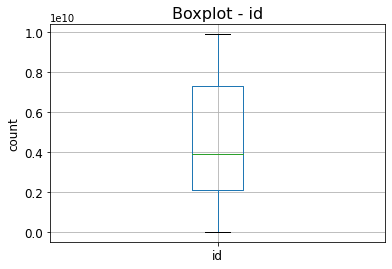

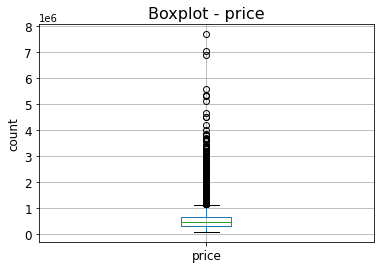

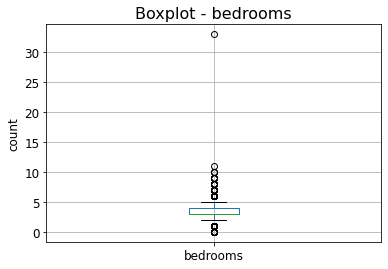

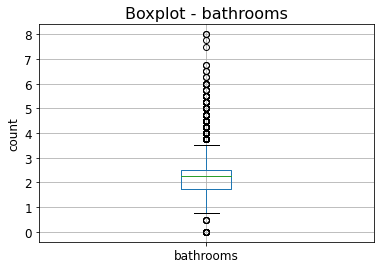

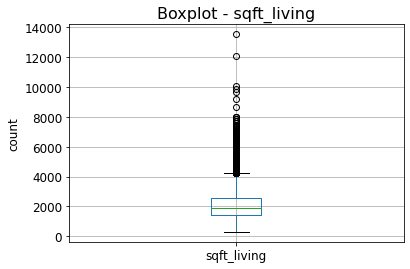

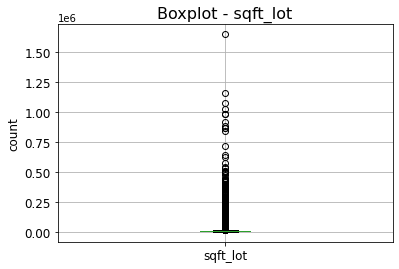

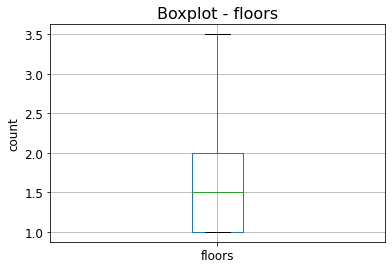

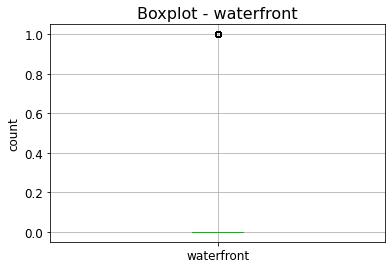

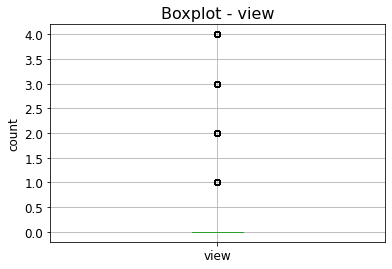

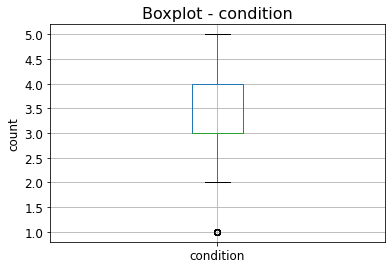

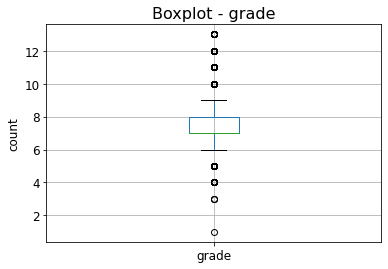

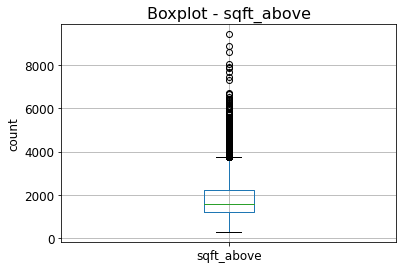

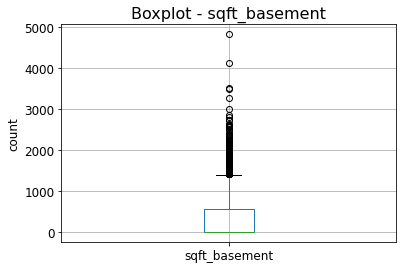

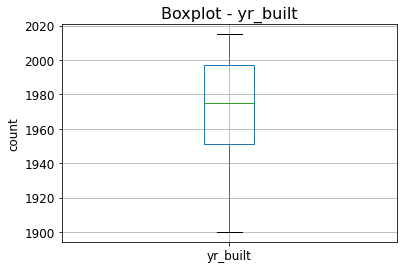

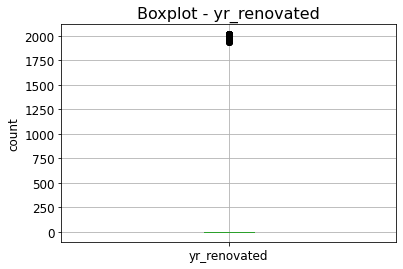

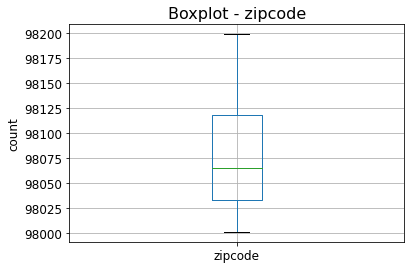

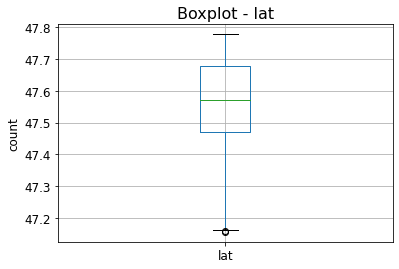

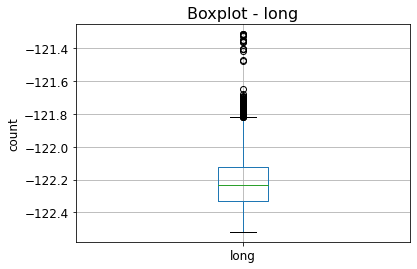

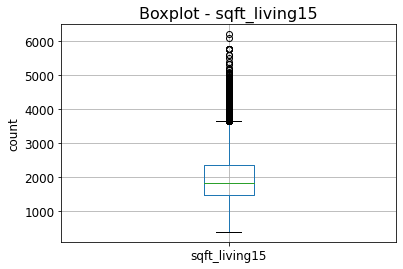

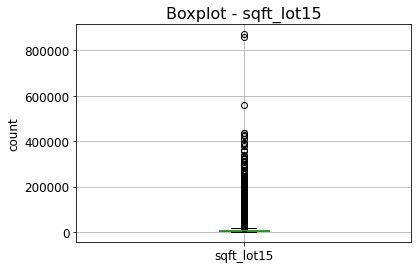

In [11]:
#Checking for Outliers
cols = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']

for column in cols:
    plt.figure()
    df_clean.boxplot([column], fontsize= 12)
    plt.ylabel('count', fontsize = 12)
    plt.title('Boxplot - {}'.format(column), fontsize = 16)

There are many outliers but dropping them will result to a lot of data being lost so we just work with the outliers.

In [12]:
#dropping unneccessary columns
#droping columns that are not useful
df_clean1 = df_clean.drop(columns = ['id', 'zipcode'])
df_clean1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


##**Exploratory Data Analysis**

###**Univariate Analysis**

In [13]:
#Previewing the dataset
df_clean1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [14]:
#checking how variables are correlated
import seaborn as sns
correlations = df_clean.corr()
correlations

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016803,0.001354,0.005093,-0.012239,-0.132101,0.018482,-0.002717,0.011785,-0.023686,0.008093,-0.010857,-0.005084,0.021218,-0.016688,-0.008129,-0.001861,0.020776,-0.002869,-0.138778
price,-0.016803,1.000000,0.308346,0.525140,0.702046,0.089658,0.256793,0.266332,0.397466,0.036397,0.667478,0.605569,0.323849,0.053980,0.126503,-0.053162,0.306922,0.021567,0.585382,0.082457
bedrooms,0.001354,0.308346,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152721,-0.008953,0.129474,0.391633,0.029233
bathrooms,0.005093,0.525140,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,-0.203831,0.024590,0.223047,0.568665,0.087191
sqft_living,-0.012239,0.702046,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,-0.199435,0.052521,0.240221,0.756420,0.183285
sqft_lot,-0.132101,0.089658,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.129611,-0.085680,0.229552,0.144620,0.718556
floors,0.018482,0.256793,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,-0.059025,0.049593,0.125343,0.279861,-0.011250
waterfront,-0.002717,0.266332,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.030277,-0.014272,-0.041904,0.086469,0.030702
view,0.011785,0.397466,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.084838,0.006049,-0.078560,0.280404,0.072577
condition,-0.023686,0.036397,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,0.002962,-0.014971,-0.106512,-0.092854,-0.003424


(array([1.9018e+04, 2.1420e+03, 3.2200e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <a list of 10 Patch objects>)

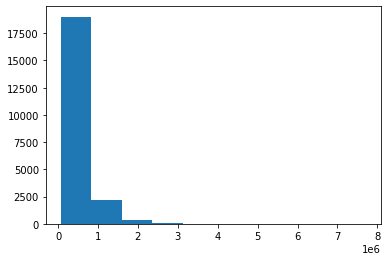

In [15]:
#A histogram of the price column
plt.hist(df_clean1['price'])

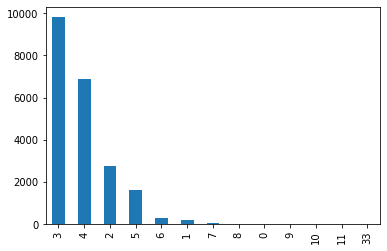

In [16]:
#A bar chart representing the number of bedrooms
df_clean1['bedrooms'].value_counts().plot.bar()

The bar chart shows that the houses with 3 bedrooms are the most followed by 4 then 2.

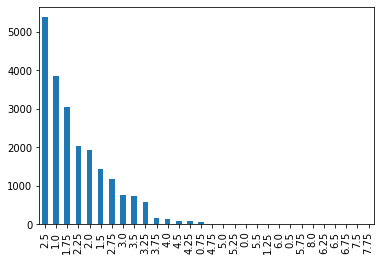

In [17]:
#A bar chart representing the number of bathrooms
df_clean1['bathrooms'].value_counts().plot.bar()

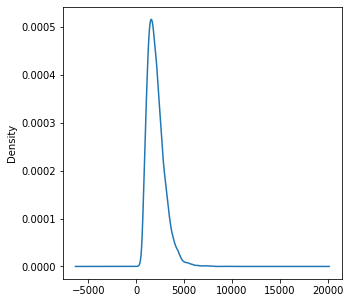

In [18]:
#A density plot representing sqft_living
plt.figure(figsize = (5,5))
df_clean1['sqft_living'].plot(kind='density')

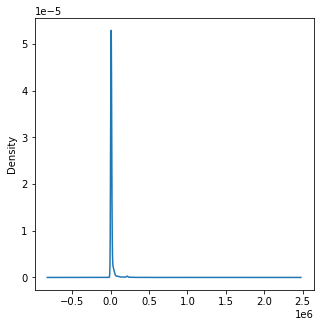

In [19]:
#A density plot representing sqft_parking lot
plt.figure(figsize = (5,5))
df_clean1['sqft_lot'].plot(kind='density')

In [20]:
df_clean1['floors'].nunique()

6

In [21]:
# Frequency table for floors in percentage

round(df_clean1.floors.value_counts(normalize = True),2)

1.0    0.49
2.0    0.38
1.5    0.09
3.0    0.03
2.5    0.01
3.5    0.00
Name: floors, dtype: float64

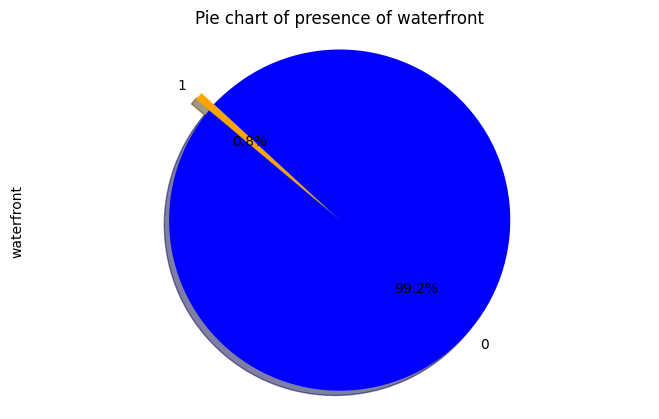

In [22]:
# Pie Chart for waterfront

waterfront = df_clean1.waterfront.value_counts()
plt.figure(figsize= (8,5), dpi=100)

# Highlighting yes
explode = (0.1, 0)  
colors = ['blue', 'orange']

# Plotting our pie chart
waterfront.plot.pie(explode = explode, colors = colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Pie chart of presence of waterfront')
plt.show()

99.2% - There is no waterfront

0.8% - There is a waterfront

In [23]:
# Frequency table for view in percentage

round(df_clean1.view.value_counts(normalize = True),2)

0    0.90
2    0.04
3    0.02
1    0.02
4    0.01
Name: view, dtype: float64

In [24]:
# Frequency table for condition in percentage

round(df_clean1.condition.value_counts(normalize = True),2)

3    0.65
4    0.26
5    0.08
2    0.01
1    0.00
Name: condition, dtype: float64

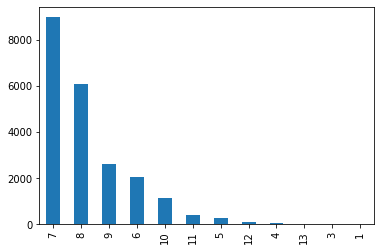

In [25]:
#Abar chart representing  the grade column
df_clean1['grade'].value_counts().plot.bar()

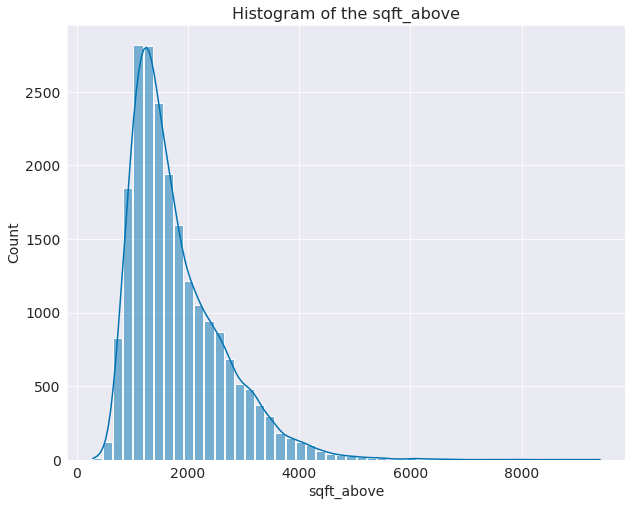

In [26]:
# Histogram for sqft_above
def histogram(var1, bins):
  plt.figure(figsize= (10,8)),
  sns.set_style('darkgrid'),
  sns.set_palette('colorblind'),
  sns.histplot(x = var1, data=df_clean1,  bins = bins , shrink= 0.9, kde = True)
histogram('sqft_above', 50)

plt.title('Histogram of the sqft_above', fontsize = 16)
plt.xlabel('sqft_above', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

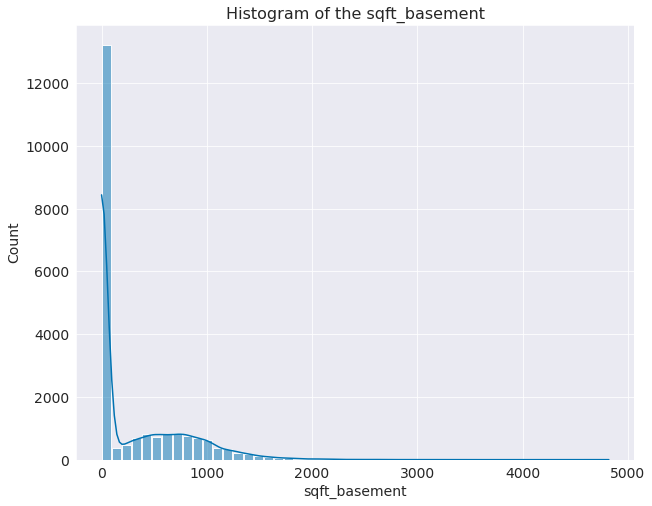

In [27]:
# Histogram for sqft_basement
def histogram(var1, bins):
  plt.figure(figsize= (10,8)),
  sns.set_style('darkgrid'),
  sns.set_palette('colorblind'),
  sns.histplot(x = var1, data=df_clean1,  bins = bins , shrink= 0.9, kde = True)
histogram('sqft_basement', 50)

plt.title('Histogram of the sqft_basement', fontsize = 16)
plt.xlabel('sqft_basement', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

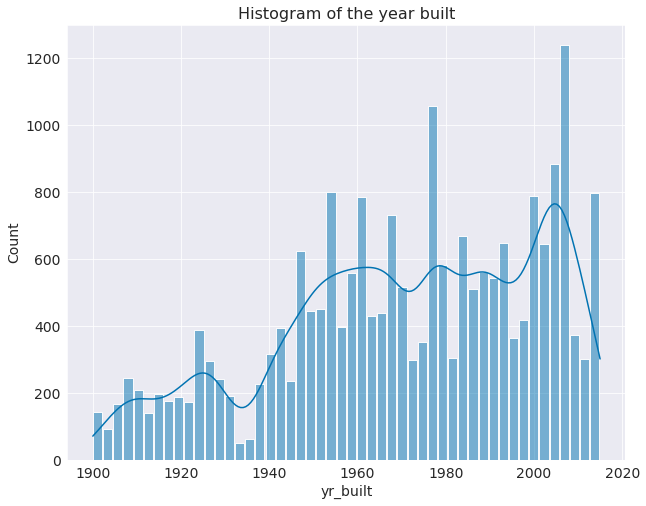

In [28]:
# Histogram for yr_built
def histogram(var1, bins):
  plt.figure(figsize= (10,8)),
  sns.set_style('darkgrid'),
  sns.set_palette('colorblind'),
  sns.histplot(x = var1, data=df_clean1,  bins = bins , shrink= 0.9, kde = True)
histogram('yr_built', 50)

plt.title('Histogram of the year built', fontsize = 16)
plt.xlabel('yr_built', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

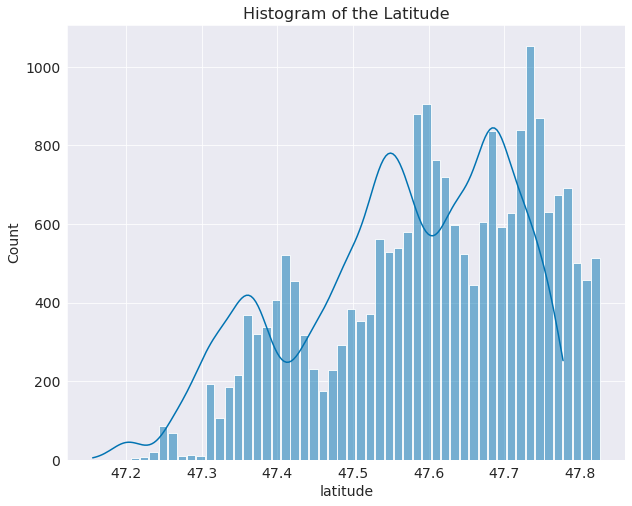

In [29]:
# Histogram for Latitude
def histogram(var1, bins):
  plt.figure(figsize= (10,8)),
  sns.set_style('darkgrid'),
  sns.set_palette('colorblind'),
  sns.histplot(x = var1, data=df_clean1,  bins = bins , shrink= 0.9, kde = True)
histogram('lat', 50)

plt.title('Histogram of the Latitude', fontsize = 16)
plt.xlabel('latitude', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

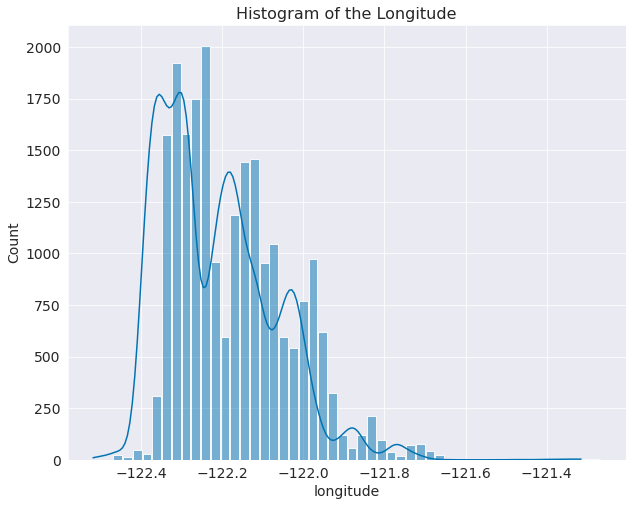

In [30]:
# Histogram for Longitude
def histogram(var1, bins):
  plt.figure(figsize= (10,8)),
  sns.set_style('darkgrid'),
  sns.set_palette('colorblind'),
  sns.histplot(x = var1, data=df_clean1,  bins = bins , shrink= 0.9, kde = True)
histogram('long', 50)

plt.title('Histogram of the Longitude', fontsize = 16)
plt.xlabel('longitude', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

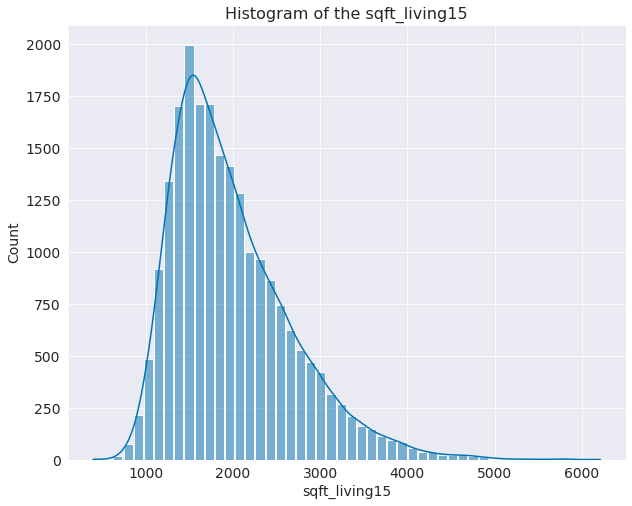

In [31]:
# Histogram for sqft_living15
def histogram(var1, bins):
  plt.figure(figsize= (10,8)),
  sns.set_style('darkgrid'),
  sns.set_palette('colorblind'),
  sns.histplot(x = var1, data=df_clean1,  bins = bins , shrink= 0.9, kde = True)
histogram('sqft_living15', 50)

plt.title('Histogram of the sqft_living15', fontsize = 16)
plt.xlabel('sqft_living15', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

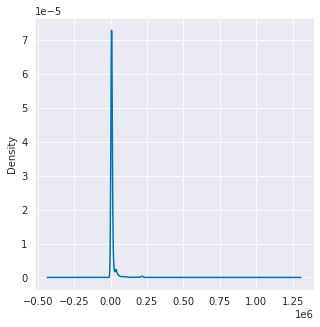

In [32]:
#A density plot representing sqft_lot15
plt.figure(figsize = (5,5))
df_clean1['sqft_lot15'].plot(kind='density')

####**Measures of central tendency and measures of dispersion**

In [33]:
#checking the description of the dataset
df_clean1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,47.560049,-122.213910,1986.518695,12769.031976
std,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,0.138572,0.140833,685.425781,27305.972464
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.470925,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


####**Skewness and Kurtosis**

In [34]:
#Checking for the skewness of the variables
df_clean1.skew()

price             4.021467
bedrooms          1.974244
bathrooms         0.511164
sqft_living       1.471532
sqft_lot         13.059170
floors            0.616523
waterfront       11.384300
view              3.396872
condition         1.032789
grade             0.771297
sqft_above        1.446758
sqft_basement     1.577814
yr_built         -0.469823
yr_renovated      4.551974
lat              -0.485185
long              0.885312
sqft_living15     1.108290
sqft_lot15        9.506129
dtype: float64

We can observe that price, sqft_lot, waterfront,view, yr_renovated and sqft_lot15 are highly skewed.

In [35]:
#Checking for the kurtosis of the variables
df_clean1.kurt()

price             34.517438
bedrooms          49.060108
bathrooms          1.279637
sqft_living        5.242223
sqft_lot         285.040621
floors            -0.484246
waterfront       127.614090
view              10.902118
condition          0.525688
grade              1.191090
sqft_above         3.402008
sqft_basement      2.714886
yr_built          -0.657207
yr_renovated      18.723733
lat               -0.676601
long               1.049829
sqft_living15      1.597009
sqft_lot15       150.743275
dtype: float64

We can also observe that variables such as waterfront, sqft_lot15, bedrooms and sqft_lot are highly peaked.

###**Bivariate analysis**

In [36]:
#checking how variables are correlated
import seaborn as sns
correlations = df_clean1.corr()
correlations

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308346,0.525140,0.702046,0.089658,0.256793,0.266332,0.397466,0.036397,0.667478,0.605569,0.323849,0.053980,0.126503,0.306922,0.021567,0.585382,0.082457
bedrooms,0.308346,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.008953,0.129474,0.391633,0.029233
bathrooms,0.525140,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,0.024590,0.223047,0.568665,0.087191
sqft_living,0.702046,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,0.052521,0.240221,0.756420,0.183285
sqft_lot,0.089658,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.085680,0.229552,0.144620,0.718556
floors,0.256793,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,0.049593,0.125343,0.279861,-0.011250
waterfront,0.266332,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,-0.014272,-0.041904,0.086469,0.030702
view,0.397466,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.006049,-0.078560,0.280404,0.072577
condition,0.036397,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,-0.014971,-0.106512,-0.092854,-0.003424
grade,0.667478,0.357003,0.664990,0.762719,0.113644,0.458151,0.082785,0.251378,-0.144655,1.000000,0.755919,0.168443,0.446966,0.014372,0.114086,0.198347,0.713208,0.119265


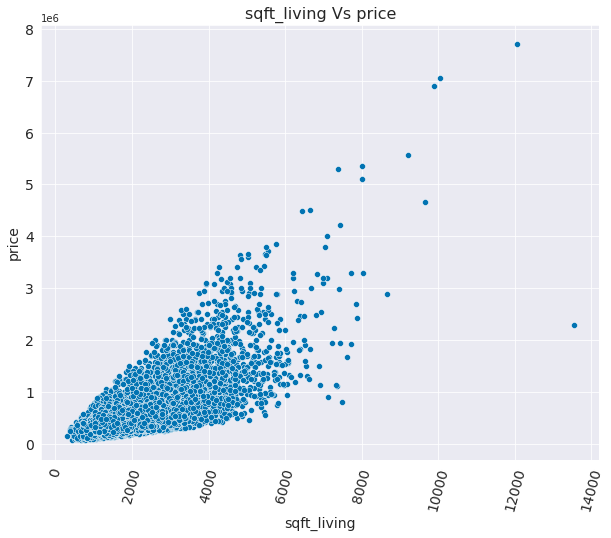

In [37]:
#A scatter plot that shows the relationship between sqft_living and price
plt.figure(figsize= (10,8))
sns.scatterplot(x= df_clean1.sqft_living, y = df_clean1.price)
plt.title('sqft_living Vs price', fontsize = 16)
plt.ylabel('price', fontsize=14)
plt.xlabel('sqft_living', fontsize=14)
plt.xticks(rotation = 75, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

There is a high correlation between sqft_living and price

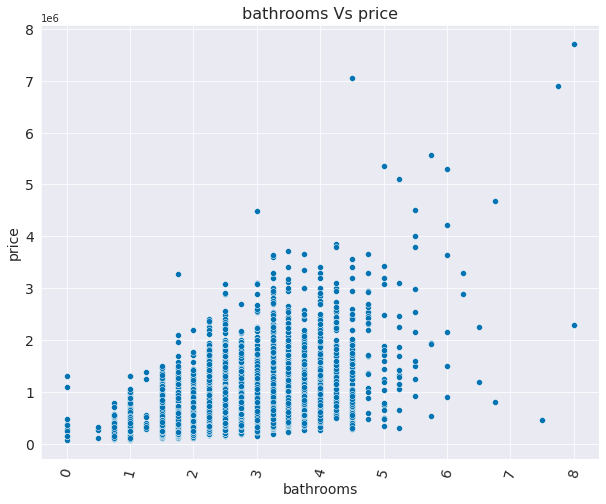

In [38]:
#A scatter plot that shows the relationship between bathrooms and price
plt.figure(figsize= (10,8))
sns.scatterplot(x= df_clean1.bathrooms, y = df_clean1.price)
plt.title('bathrooms Vs price', fontsize = 16)
plt.ylabel('price', fontsize=14)
plt.xlabel('bathrooms', fontsize=14)
plt.xticks(rotation = 75, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

There is a slightly high correlation between bathrooms and price

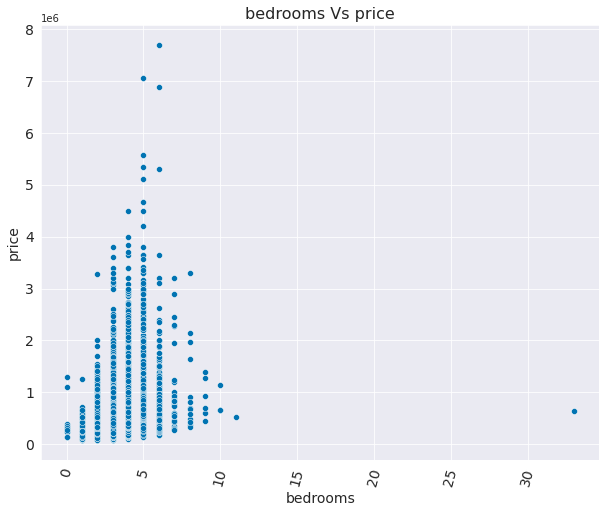

In [39]:
#A scatter plot that shows the relationship between bedrooms and price
plt.figure(figsize= (10,8))
sns.scatterplot(x= df_clean1.bedrooms, y = df_clean1.price)
plt.title('bedrooms Vs price', fontsize = 16)
plt.ylabel('price', fontsize=14)
plt.xlabel('bedrooms', fontsize=14)
plt.xticks(rotation = 75, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

There is a slightly high correlation between bedrooms and price

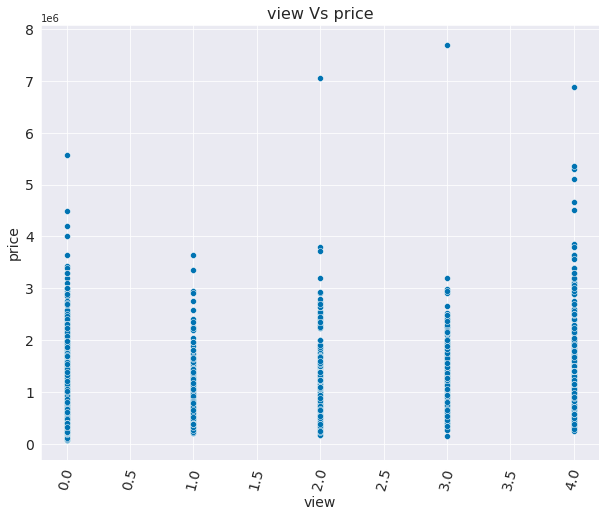

In [40]:
#A scatter plot that shows the relationship between view and price
plt.figure(figsize= (10,8))
sns.scatterplot(x= df_clean1.view, y = df_clean1.price)
plt.title('view Vs price', fontsize = 16)
plt.ylabel('price', fontsize=14)
plt.xlabel('view', fontsize=14)
plt.xticks(rotation = 75, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

There is some correlation between price and view

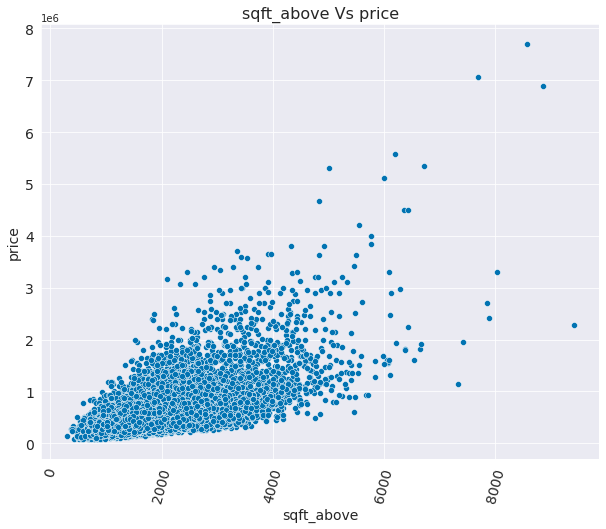

In [41]:
##A scatter plot that shows the relationship between sqft_above and price
plt.figure(figsize= (10,8))
sns.scatterplot(x= df_clean1.sqft_above, y = df_clean1.price)
plt.title('sqft_above Vs price', fontsize = 16)
plt.ylabel('price', fontsize=14)
plt.xlabel('sqft_above', fontsize=14)
plt.xticks(rotation = 75, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

We have a high correlation between sqft above and price

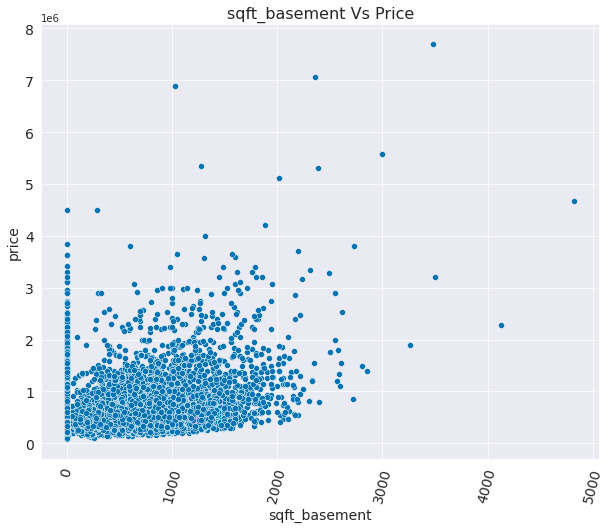

In [42]:
#A scatter plot that shows the relationship between sqft_basement and price
plt.figure(figsize= (10,8))
sns.scatterplot(x= df_clean1.sqft_basement, y = df_clean1.price)
plt.title('sqft_basement Vs Price', fontsize = 16)
plt.ylabel('price', fontsize=14)
plt.xlabel('sqft_basement', fontsize=14)
plt.xticks(rotation = 75, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

sqft_basement is highly correlated to price

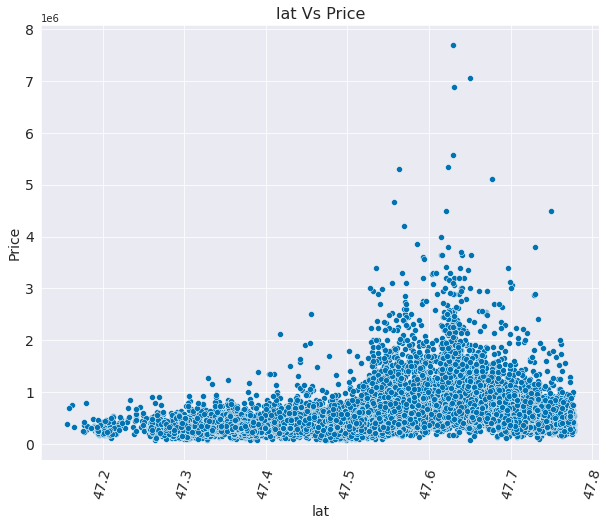

In [43]:
#A scatter plot that shows the relationship between latitude and price
plt.figure(figsize= (10,8))
sns.scatterplot(x= df_clean1.lat, y = df_clean1.price)
plt.title('lat Vs Price', fontsize = 16)
plt.ylabel('Price', fontsize=14)
plt.xlabel('lat', fontsize=14)
plt.xticks(rotation = 75, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

There is some slight correlation between latitude and price.

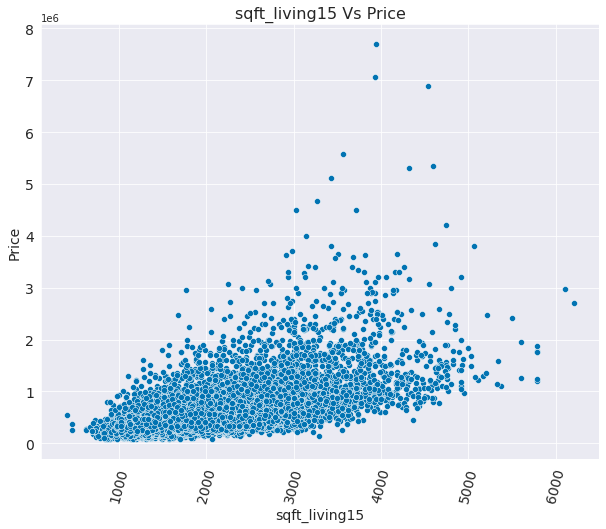

In [44]:
#A scatter plot that shows the relationship between sqft_living15 and price
plt.figure(figsize= (10,8))
sns.scatterplot(x= df_clean1.sqft_living15, y = df_clean1.price)
plt.title('sqft_living15 Vs Price', fontsize = 16)
plt.ylabel('Price', fontsize=14)
plt.xlabel('sqft_living15', fontsize=14)
plt.xticks(rotation = 75, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

sqft_living is highly correlated to price

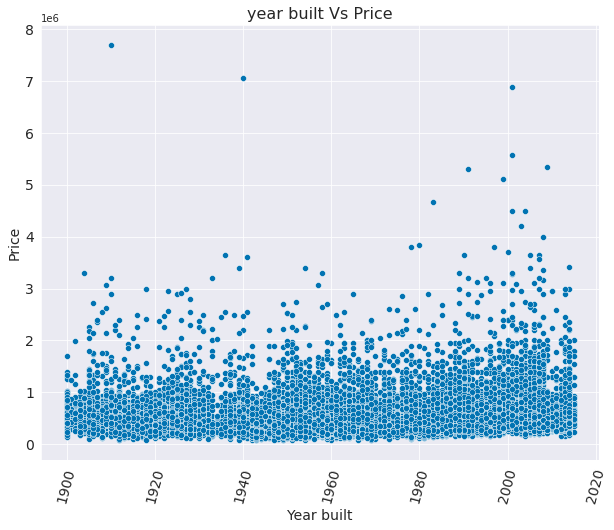

In [45]:
#A scatter plot that shows the relationship between year built and price
plt.figure(figsize= (10,8))
sns.scatterplot(x= df_clean1.yr_built, y = df_clean1.price)
plt.title('year built Vs Price', fontsize = 16)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year built', fontsize=14)
plt.xticks(rotation = 75, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

There is a very low correlation between year built and price

In [46]:
#checking the columns
df_clean1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

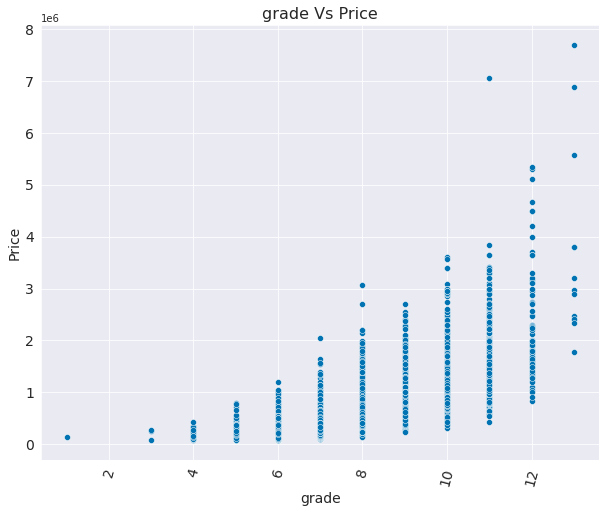

In [47]:
#A scatter plot that shows the relationship between grade and price
plt.figure(figsize= (10,8))
sns.scatterplot(x= df_clean1.grade, y = df_clean1.price)
plt.title('grade Vs Price', fontsize = 16)
plt.ylabel('Price', fontsize=14)
plt.xlabel('grade', fontsize=14)
plt.xticks(rotation = 75, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

We can observe that grade is highly correlated to price

###**Multivariate Analysis**

In [ ]:
#A pair plot representing the data
plt.figure(figsize=(3, 3))
sns.pairplot(df_clean1, diag_kind='kde');

We can observe that some variables such as sqft_living, sqft_above and bathrooms are highly correlated to price.

In [ ]:
#A scatter plot that shows the relationship between sqft_living, waterfront and price
sns.lmplot("price", "sqft_living", df_clean1, hue="waterfront", fit_reg=False);

From the scatter plot, we can observe that the variables(price and sqft_living) are highly correlated.

In [ ]:
#A scatter plot that shows the relationship between grade, waterfront and price
sns.lmplot("price", "grade", df_clean1, hue="waterfront", fit_reg=False);

We can observe that the variables are correlated

In [ ]:
#A scatter plot that shows the relationship between yr_renovated, waterfront and price
sns.lmplot("price", "yr_renovated", df_clean1, hue="waterfront", fit_reg=False);

We can observe that there is a very low correlation between the variables

In [ ]:
#checking the columns
df_clean1.columns

In [ ]:
#A profile plot to see the variation in each of the variables
ax = df_clean1[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

It is quite clear from the profile plot that the mean and standard deviation of price is higher than the other variables.

In [ ]:
correlations = df_clean1.corr()
correlations

We can see from the correlation matrix that sqft_living,grade and sqft_above are highly correlated to price.

In [ ]:
#A heatmap showing correlation of different variables
sns.heatmap(correlations, vmax=1., square=False).xaxis.tick_top()

##**Multi-Linear Regression**

**Assumptions of a linear regression model**
* There must be a linear relationship between independent and dependent variables.
* There should not be any outliers present.
* No heteroscedasticity.
* Sample variables should be independent.
* Error terms should be normally distributed with mean 0 and a constant variance.
* Absence of multicollinearity and autocorrellation.

**Checking for Multicollinearity**

In [ ]:
from scipy.stats import norm
from scipy import stats
#applying log transformation
df_clean1['price'] = np.log(df_clean1['price'])
sns.distplot(df_clean1['price'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df_clean1['price'], plot=plt)




In [ ]:
# Let's display the correlations between the variables
correlations = df_clean1.corr()
correlations

In [ ]:
#computing the VIF
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

There is some multicollinearity since some variables such as sqft_basement have a VIF of more than 5  

**Creating the multilinear regression model**

In [ ]:
# Previewing the statistical details of the dataset
# 
df_clean1.describe()

In [ ]:
# Preparing the Data
# Dividing the data into attributes and labels 
X = df_clean1[['bathrooms', 'sqft_living', 'grade', 'sqft_above',
       'sqft_living15']]
y = df_clean1['price']

In [ ]:
# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Training the Algorithm
# ---
# To train the algorithm we execute the same code as before, using the fit() method of the LinearRegression class
# ---
# 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
# In case of multivariable linear regression, the regression model has to 
# find the most optimal coefficients for all the attributes. 
# To see what coefficients our regression model has chosen, execute the following
# 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

In [ ]:
# Making Predictions
# ---
# To make pre-dictions on the test data, execute the following
# ---
# 
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


In [ ]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

We can see that it has an Rmse of 0.3427

In [ ]:
#computing the R-squared
from sklearn.metrics import mean_squared_error, r2_score
R1 = r2_score(y_test, y_pred)
R1

This shows that our variables explain more than 58% of our dependent variable.

In [ ]:
#checking for the mean of the price column
df_clean1['price'].mean()

The root mean squared error is significantly higher than 10% of the price mean and we conclude that our model is not that good.

The following may have caused us to have the inaccurate model:
* Our dataset has a significant amount of outliers.
* There is presence of multicollinearity
* The assumption that there is a linear relationship between independent and dependent variables.


**Residual plots and heteroscedasticity testing**

In [ ]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Our model is not that bad since most values are centered close to the mean that is around 0

**Barlett's test**
The test establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

Since the variances are homogeneous, we conclude that there is no heteroscedasticity.

In [ ]:
#Distribution of error terms
res = sns.distplot(residuals,kde=True)
res = plt.title('Distribution of the residuals')

We can see that our residuals are normally distributed

##**Quantile regression**
Quantile regression is an extension of linear regression that is used when the conditions of linear regression are not met (i.e., linearity, homoscedasticity, independence, or normality)

In [ ]:
x_quat = df_clean1['sqft_living']
y_quat = df_clean1['price']

In [ ]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('price ~ sqft_living', df_clean1)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

In [ ]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['sqft_living']] + res.conf_int().loc['sqft_living'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_quat_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

In [ ]:
# Making Predictions
# 
pred = res.predict(x_quat)
# To compare the actual output values for X_test with the predicted values
# 
df1 = pd.DataFrame({'Actual': y, 'Predicted': pred})
df1

In [ ]:
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(x)))
print(first_model)
second_model = (mean_squared_error(y_true=y,y_pred=res.predict(x_quat)))
print(second_model)

##**Ridge regression**
Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where independent variables are highly correlated

In [ ]:
x = df_clean1[['bathrooms', 'sqft_living', 'grade', 'sqft_above',
       'sqft_living15']]
y = df_clean1['price']

In [ ]:
# Ceating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(x,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(x)))
print(first_model)

In [ ]:
# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 
# L2 is the name of the hyperparameter that is used in ridge regression. 
# Determining the value of a hyperparameter requires the use of a grid. 
# In the code below, we first create our ridge model and indicate normalization in order to get better estimates. 
# Next we setup the grid that we will use. 
# The search object has several arguments within it. Alpha is hyperparameter we are trying to set. 
# The log space is the range of values we want to test. 
# We want the log of -5 to 2, but we only get 8 values from within that range evenly spread out. 
# Are metric is the mean squared error. Refit set true means to adjust the parameters while modeling 
# and cv is the number of folds to develop for the cross-validation.
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
print(search.best_params_)
{'alpha': 0.01}
abs(search.best_score_) 

In [ ]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.0001)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

In [ ]:
# The 41106549145.36187 is lower than the 41589854186.65236. This is because the last results are not cross-validated. 
# In addition, these results indicate that there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,df_clean1.columns):
   coef_dict_baseline[feat] = coef
coef_dict_baseline

The coefficient values are about the same. This means that the penalization made a difference with this dataset.

##**Lasso regression**
* Lasso regression deals with multicollinearity.
* Similar to Ridge Regression, Lasso (Least Absolute Shrinkage and Selection Operator) also penalizes the absolute size of the regression coefficients. In addition, it is capable of reducing the variability and improving the accuracy of linear regression models.
* The assumptions of lasso regression is same as least squared regression except normality is not to be assumed
* Lasso Regression shrinks coefficients to zero (exactly zero), which certainly helps in feature selection
* Lasso is a regularization method and uses l1 regularization
If group of predictors are highly correlated, lasso picks only one of them and shrinks the others to zero

In [ ]:
df_clean1.columns

In [ ]:

# This is a simple implementation of the lasso regression
# Loading our libraries
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Creating lasso regression with alpha value
regr = Lasso(alpha=0.5)
# Fitting the linear regression
model = regr.fit(X_std, y) 

In [ ]:
#Building the Lasso model.
# first  we will train it on the whole dataset and look at an R-squared score and on the model coefficients. 
# that we are not setting the alpha, it is defined as 1.
# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_)

In [ ]:

#Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

In [ ]:

import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

As we can see, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 

##**Elastic Net regression**
* ElasticNet is hybrid of Lasso and Ridge Regression techniques. It is useful when there are multiple features which are correlated.
* It encourages group effect in case of highly correlated variables
* There are no limitations on the number of selected variables
* It can suffer with double shrinkage

In [ ]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

In [ ]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,x.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

In [ ]:
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
#We searching for the best parameter as well as the best value for alpha
search.fit(X,y)
search.best_params_
abs(search.best_score_)
print(search.best_params_)
print(abs(search.best_score_))

In [ ]:
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 

elastic=ElasticNet(normalize=True,alpha=0.00005,l1_ratio=0.8)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

In [ ]:
# Below are the coefficients
# 
# this are the coeffients for the elastic netregression that will be compared to the baseline coeffients
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


##**Conclusion**
The MSEs of the varius models used are as follows:
Elastic Net regression = 0.1250
Lasso regression = 0.1376
Ridge regression = 0.1193
Multilinear regression = 0.1174
Quantile regression = 0.3737
Using MSE, we can conclude that the best model in this case is the multilinear regression model since it has the lowest MSE.